In [1]:
import sys
from collections import Counter
from time import gmtime, strftime
#print(sys.modules)

if False:
    try:
        del sys.modules['scholarly']
    except KeyError:
        print("module not found, installing")
        !conda install -c conda-forge scholarly
#!conda install -c conda-forge scholarly
#!pip install scholarly

In [2]:
#!pip install arrow
#!pip install bibtexparser
#!pip install matplotlib

In [3]:
from scholarly import scholarly
from collections import defaultdict
from matplotlib import pyplot as plt

In [4]:
if False:
    #sys.path.append("scholarly/")
    from scholarly import ProxyGenerator

    # Set up a ProxyGenerator object to use free proxies
    # This needs to be done only once per session
    pg = ProxyGenerator()
    pg.FreeProxies()
    scholarly.use_proxy(pg)

    # Now search Google Scholar from behind a proxy
    search_query = scholarly.search_pubs('Perception of physical stability and center of mass of 3D objects')
    scholarly.pprint(next(search_query))

In [5]:
search_query = scholarly.search_author("Julian Hough")

In [6]:
# Retrieve the author's data, fill-in, and print

# Retrieve the first result from the iterator
first_author_result = next(search_query)
# Retrieve all the details for the author
author = scholarly.fill(first_author_result )
#scholarly.pprint(author)
#print(author)
print(author.keys())
if False:

    scholarly.pprint(first_author_result)

    while "Swansea" not in author["affiliation"]:
        first_author_result = next(search_query)
        # Retrieve all the details for the author
        author = scholarly.fill(first_author_result )
        #scholarly.pprint(author)
        #scholarly.pprint(first_author_result)

scholarly.pprint(author)
scholarly.pprint(first_author_result)


# Take a closer look at the first publication
#first_publication = author['publications'][0]
#first_publication_filled = scholarly.fill(first_publication)
#print(scholarly.pprint(first_publication_filled))

dict_keys(['container_type', 'filled', 'source', 'scholar_id', 'url_picture', 'name', 'affiliation', 'email_domain', 'interests', 'citedby', 'organization', 'homepage', 'citedby5y', 'hindex', 'hindex5y', 'i10index', 'i10index5y', 'cites_per_year', 'coauthors', 'publications', 'public_access'])
b'{\'affiliation\': \'Swansea University\',\n \'citedby\': 1791,\n \'citedby5y\': 923,\n \'cites_per_year\': {2012: 9,\n                    2013: 85,\n                    2014: 40,\n                    2015: 47,\n                    2016: 241,\n                    2017: 317,\n                    2018: 120,\n                    2019: 94,\n                    2020: 143,\n                    2021: 180,\n                    2022: 220,\n                    2023: 230,\n                    2024: 56},\n \'coauthors\': [{\'affiliation\': \'Professor of Computational Linguistics, Queen \'\n                               \'Mary University of London / Jo\xc5\xbeef Stefan \xe2\x80\xa6\',\n                \'fi

In [7]:
#pubs =  [scholarly.fill(pub) for pub in author['publications']]

In [8]:

#author = scholarly.scholarly.fill #([a for a in author][0])
print(author)

{'container_type': 'Author', 'filled': ['basics', 'indices', 'counts', 'coauthors', 'publications', 'public_access'], 'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 'SEARCH_AUTHOR_SNIPPETS'>, 'scholar_id': 'PYUqCywAAAAJ', 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=PYUqCywAAAAJ', 'name': 'Julian Hough', 'affiliation': 'Swansea University', 'email_domain': '@swansea.ac.uk', 'interests': ['Dialogue', 'Dialogue Systems', 'Disfluency', 'Natural Language Processing', 'Human-Robot Interaction'], 'citedby': 1791, 'organization': 16660946388469754448, 'homepage': 'https://www.swansea.ac.uk/staff/julian.hough/#bbq=on', 'citedby5y': 923, 'hindex': 25, 'hindex5y': 18, 'i10index': 41, 'i10index5y': 31, 'cites_per_year': {2012: 9, 2013: 85, 2014: 40, 2015: 47, 2016: 241, 2017: 317, 2018: 120, 2019: 94, 2020: 143, 2021: 180, 2022: 220, 2023: 230, 2024: 56}, 'coauthors': [{'container_type': 'Author', 'filled': [], 'scholar_id': 'RlNm1d4AAAAJ', 'source': <AuthorSour

In [9]:
if False:
    paper = scholarly.fill(author['publications'][0])

In [10]:
if False:
    citations = [citation['bib']['title'] for citation in scholarly.citedby(paper)]
    print(citations)

In [11]:
# 2013 BBS abstract cited articles 33 too many
# 2016 BBS abstract cited artciles 29 too many
# 2017 BBS asbtract cited articles 32 too many

BBS_2013_PEN = {"BBS_2013_PEN" : 33}
BBS_2016_PEN = {"BBS_2016_PEN" : 29}
BBS_2017_PEN = {"BBS_2017_PEN" : 32}
IS_2015_PEN = {"IS_2015_BONUS" : 0}

In [12]:
def h_score(citations):
    h = 0
    for i, s in enumerate(sorted(citations, reverse=True)):
        if s < (i + 1):
            break
        h = i +1
            
    return h

def i_score(citations, i=10):
    return len([a for a in filter( lambda x: x>=i, citations)])

In [13]:
# for pub in author.publications:
#    print type(pub), hasattr(pub, 'citedby')

In [14]:
author

{'container_type': 'Author',
 'filled': ['basics',
  'indices',
  'counts',
  'coauthors',
  'publications',
  'public_access'],
 'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 'SEARCH_AUTHOR_SNIPPETS'>,
 'scholar_id': 'PYUqCywAAAAJ',
 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=PYUqCywAAAAJ',
 'name': 'Julian Hough',
 'affiliation': 'Swansea University',
 'email_domain': '@swansea.ac.uk',
 'interests': ['Dialogue',
  'Dialogue Systems',
  'Disfluency',
  'Natural Language Processing',
  'Human-Robot Interaction'],
 'citedby': 1791,
 'organization': 16660946388469754448,
 'homepage': 'https://www.swansea.ac.uk/staff/julian.hough/#bbq=on',
 'citedby5y': 923,
 'hindex': 25,
 'hindex5y': 18,
 'i10index': 41,
 'i10index5y': 31,
 'cites_per_year': {2012: 9,
  2013: 85,
  2014: 40,
  2015: 47,
  2016: 241,
  2017: 317,
  2018: 120,
  2019: 94,
  2020: 143,
  2021: 180,
  2022: 220,
  2023: 230,
  2024: 56},
 'coauthors': [{'container_type': 'Author',
   'f

In [15]:
for pub in author['publications']:
    print(pub)

{'container_type': 'Publication', 'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 'AUTHOR_PUBLICATION_ENTRY'>, 'bib': {'title': 'Incremental semantic construction in a dialogue system', 'pub_year': '2011', 'citation': 'IWCS, 365-369, 2011'}, 'filled': False, 'author_pub_id': 'PYUqCywAAAAJ:u5HHmVD_uO8C', 'num_citations': 185, 'citedby_url': 'https://scholar.google.com/scholar?oi=bibs&hl=en&cites=17496172425744673930', 'cites_id': ['17496172425744673930']}
{'container_type': 'Publication', 'source': <PublicationSource.AUTHOR_PUBLICATION_ENTRY: 'AUTHOR_PUBLICATION_ENTRY'>, 'bib': {'title': 'Feedback in conversation as incremental semantic update', 'pub_year': '2015', 'citation': 'IWCS, 2015'}, 'filled': False, 'author_pub_id': 'PYUqCywAAAAJ:8k81kl-MbHgC', 'num_citations': 141, 'citedby_url': 'https://scholar.google.com/scholar?oi=bibs&hl=en&cites=9412640567366467351', 'cites_id': ['9412640567366467351']}
{'container_type': 'Publication', 'source': <PublicationSource.AUTHOR_PUBLICAT

In [16]:
penalties = {
    'Incremental semantic construction in a dialogue system' : [BBS_2013_PEN, BBS_2016_PEN, BBS_2017_PEN],
   
    'Feedback in conversation as incremental semantic update' : [BBS_2016_PEN, BBS_2017_PEN],
    'Incremental grammar induction from child-directed dialogue utterances' : [BBS_2016_PEN, BBS_2017_PEN],

    'Incremental semantics driven natural language generation with self-repairing capability' : [BBS_2013_PEN],
    
    'Modelling Incremental Self-Repair Processing in Dialogue.' : [BBS_2017_PEN],
    'Probabilistic record type lattices for incremental reference processing' : [BBS_2017_PEN],
    
    'Processing self-repairs in an incremental type-theoretic dialogue system' :  [BBS_2016_PEN],
    'Modelling expectation in the self-repair processing of annotat-, um, listeners' : [BBS_2016_PEN],

    
    'Recurrent neural networks for incremental disfluency detection' : [IS_2015_PEN],#-2
    
    'On making syntax dynamic' : [BBS_2016_PEN, BBS_2017_PEN],
    'Finishing each other’s... Responding to incomplete contributions in dialogue' : [BBS_2013_PEN],
    'Divergence in dialogue' : [BBS_2017_PEN, BBS_2016_PEN],
    'Divergence in Dialogue' : [BBS_2017_PEN, BBS_2016_PEN],
    'The dynamics of lexical interfaces' : [BBS_2013_PEN],
    'Structural divergence in dialogue' : [BBS_2013_PEN],
     'Helping the medicine go down: Repair and adherence in patient-clinician dialogues' : [BBS_2016_PEN],
    'Language, music and interaction' : [BBS_2016_PEN],
    'Making a Contribution: Processing clarification requests in dialogue.': [BBS_2016_PEN],
    "Incrementality and intention-recognition in utterance processing" : [BBS_2013_PEN, 
                                                                               BBS_2016_PEN,
                                                                               BBS_2017_PEN],
    """Splitting the ‘I’s and crossing the ‘You’s: Context, speech acts and grammar""" : [BBS_2017_PEN, BBS_2016_PEN],
    "Language as mechanisms for interaction" : [BBS_2017_PEN],
    "Joint utterances and the (split-) turn taking puzzle" : [BBS_2017_PEN],
    "Grammar as action in language and music" : [BBS_2017_PEN],
    "Quotation in Dialogue" : [BBS_2017_PEN],
    "The role of intentions in dialogue processing" : [BBS_2017_PEN],
    "Procedural syntax" : [BBS_2017_PEN],
    "Action-based grammar" : [BBS_2017_PEN],
    "Grammars as parsers: Meeting the dialogue challenge" : [BBS_2013_PEN, BBS_2016_PEN],
    "On incrementality in dialogue: Evidence from compound contributions" : [BBS_2013_PEN],
    "Context and well-formedness: the dynamics of ellipsis" : [BBS_2016_PEN],
    "Finishing each other’s... Responding to incomplete contributions in dialogue": [BBS_2013_PEN],
    "Making a contribution: Processing clarification requests in dialogue" : [BBS_2016_PEN]
}


CURRENT_YEAR = gmtime()[0]
month_days = [28 if m==2 else (30 if m in [9,4,6,11] else 31) for m in range(1, gmtime()[1])]
print(month_days)
total_days = sum(month_days) + gmtime()[2]
CURRENT_MONTH = (gmtime()[1]-1) + (gmtime()[2]/(28.25 if gmtime()[1] == 2 else (30 if gmtime()[1] in [9,4,6,11] else 31)))
print(CURRENT_YEAR, CURRENT_MONTH, CURRENT_MONTH/12, total_days/365)

penalty_type_counts = Counter()
papers = []
years_new = defaultdict(list)
citations = []
missing_from_years = []
for pub in author['publications']:
    missing = False
    if not pub['bib'].get('pub_year'):
        missing = True
    else:
        year = int(pub['bib']['pub_year'])
        year = min([year,CURRENT_YEAR])
    #cites = 0 if not hasattr(pub, 'citedby') else pub.citedby
    cites = pub['num_citations']
    if True:
        if pub['bib']['title'] in penalties.keys():
            #print(penalties[pub['bib']['title']])
            pen = sum([sum(x.values()) for x in penalties[pub['bib']['title']]])
            for x in penalties[pub['bib']['title']]:
                penalty_type_counts[[k for k in x.keys()][0]] += 1
            if cites - pen > 0:
                cites = cites - pen
    #if year <2021:
    #    continue
    if missing:
        year = CURRENT_YEAR
        missing_from_years.append(cites)
    papers.append(cites)
    years_new[year].append(cites)
    # print pub.bib['title'], cites
    age = (CURRENT_YEAR - year) +  (total_days/365)
    #if age <= 0:
    #    age = 0.5   # give half a year for new pubs, so not 0
    cite_rate = float(cites)/float(age)
    if "Recognising conversational speech: What an incremental asr" in pub['bib']['title']:
        year = year -1
        age = age + 1
        cite_rate = float(cites)/float(age)
        print("after", year, age, cite_rate)
    citations.append((pub['bib']['title'], cites, cite_rate, year))
print(penalty_type_counts)
print("missing from years", sum(missing_from_years))
print(sum(papers),  "citations from", len(papers), "papers")
print("h", h_score(papers))
print("i", i_score(papers))

[31, 28, 31, 30]
2024 4.32258064516129 0.3602150537634408 0.3561643835616438
Counter({'BBS_2016_PEN': 5, 'BBS_2017_PEN': 5, 'BBS_2013_PEN': 2, 'IS_2015_BONUS': 1})
missing from years 0
1420 citations from 97 papers
h 24
i 41


1 Incremental semantic construction in a dialogue system 2011 : 91
2 Feedback in conversation as incremental semantic update 2015 : 80
3 Multi-modal Fusion with Gating using Audio, Lexical and Disfluency Features for Alzheimer’s Dementia Recognition from Spontaneous Speech 2020 : 61
4 Duel: A multi-lingual multimodal dialogue corpus for disfluency, exclamations and laughter 2016 : 60
5 Modelling Incremental Self-Repair Processing in Dialogue. 2015 : 59
6 Recurrent neural networks for incremental disfluency detection 2015 : 58
7 Recognising conversational speech: What an incremental ASR should do for a dialogue system and how to get there 2017 : 48
8 Towards Deep End-of-Turn Prediction for Situated Spoken Dialogue Systems 2017 : 44
9 Alzheimer’s Dementia Recognition Using Acoustic, Lexical, Disfluency and Speech Pause Features Robust to Noisy Inputs 2021 : 39
10 Understanding laughter 2015 : 39
11 Dylan: Parser for dynamic syntax 2011 : 39
12 Computational Models of Miscommunication Phe

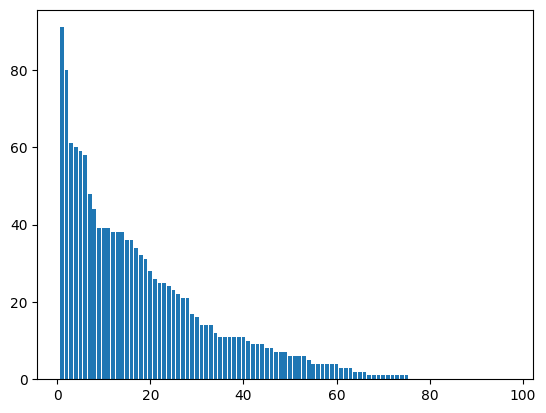

1420


In [17]:
count = 0
pub_data = []
citations =  sorted(citations, key=lambda title:title[1], reverse=True)
for title, num_cites, cite_rate, year in citations:
    #if year < 2020:
    #    continue
    if False:
        if title == "Modelling Incremental Self-Repair Processing in Dialogue.":
            continue  # skip thesis? for REF :(
        if "Duel:" in title:
            continue
        if "Pentoref:" in title:
            continue
        if "SemEval" in title:
            continue
    count+=1
    # add the cite rank
    citations[count-1] = tuple(list( citations[count-1]) + [count])  # add the ranking
    print(count, title, year, ":", num_cites)
    pub_data.append(num_cites)
plt.bar(range(1, len(pub_data)+1),pub_data)
plt.show()
print(sum(pub_data))

In [18]:
print("h :", h_score(pub_data))
prev = 0
for k in range(int(max(pub_data)), 0, -1):
    score = i_score(pub_data, i=k)
    if score == prev:
        continue
    prev = score
    print("i =", k, ":", i_score(pub_data, i=k))

h : 24
i = 91 : 1
i = 80 : 2
i = 61 : 3
i = 60 : 4
i = 59 : 5
i = 58 : 6
i = 48 : 7
i = 44 : 8
i = 39 : 11
i = 38 : 14
i = 36 : 16
i = 34 : 17
i = 32 : 18
i = 31 : 19
i = 28 : 20
i = 26 : 21
i = 25 : 23
i = 24 : 24
i = 23 : 25
i = 22 : 26
i = 21 : 28
i = 17 : 29
i = 16 : 30
i = 14 : 33
i = 12 : 34
i = 11 : 40
i = 10 : 41
i = 9 : 44
i = 8 : 46
i = 7 : 49
i = 6 : 53
i = 5 : 54
i = 4 : 60
i = 3 : 63
i = 2 : 66
i = 1 : 75


In [19]:
print(citations[0])

('Incremental semantic construction in a dialogue system', 91, 6.8133333333333335, 2011, 1)


1 Multi-modal Fusion with Gating using Audio, Lexical and Disfluency Features for Alzheimer’s Dementia Recognition from Spontaneous Speech 2020 : 61 14.003144654088052 3
2 Alzheimer’s Dementia Recognition Using Acoustic, Lexical, Disfluency and Speech Pause Features Robust to Noisy Inputs 2021 : 39 11.620408163265306 9
3 Feedback in conversation as incremental semantic update 2015 : 80 8.550512445095167 2
4 Alzheimer’s dementia recognition from spontaneous speech using disfluency and interactional features 2021 : 26 7.746938775510204 21
5 Duel: A multi-lingual multimodal dialogue corpus for disfluency, exclamations and laughter 2016 : 60 7.1803278688524586 4
6 Best of Both Worlds: Making High Accuracy Non-incremental Transformer-based Disfluency Detection Incremental 2021 : 24 7.151020408163265 24
7 Incremental semantic construction in a dialogue system 2011 : 91 6.8133333333333335 1
8 Detecting Depression with Word-Level Multimodal Fusion 2019 : 36 6.721227621483377 15
9 Recognising c

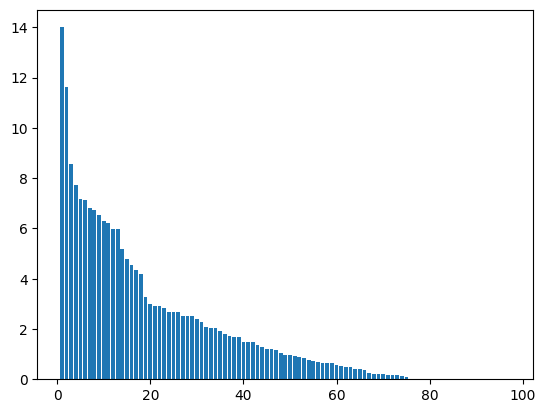

199.3062390274595


In [20]:
count = 0
pub_data = []
citations =  sorted(citations, key=lambda title:title[2], reverse=True)
for title, num_cites, cite_rate, year, other_rank in citations:
    #if year < 2020:
    #    continue
    if False:
        if title == "Modelling Incremental Self-Repair Processing in Dialogue.":
            continue  # skip thesis? for REF :(
        if "Duel:" in title:
            continue
        if "Pentoref:" in title:
            continue
        if "SemEval" in title:
            continue
    count+=1
    print(count, title, year, ":", num_cites, cite_rate, other_rank)
     # add the cite rate rank and average of cite rank and citerate rank
    citations[count-1] = tuple(list( citations[count-1]) + [count, (count+other_rank)/2])  # add t
    pub_data.append(cite_rate)
plt.bar(range(1, len(pub_data)+1),pub_data)
plt.show()
print(sum(pub_data))

In [21]:
print("h :", h_score(pub_data))
prev = 0
for k in range(int(max(pub_data)), 0, -1):
    score = i_score(pub_data, i=k)
    if score == prev:
        continue
    prev = score
    print("i =", k, ":", i_score(pub_data, i=k))

h : 6
i = 14 : 1
i = 11 : 2
i = 8 : 3
i = 7 : 6
i = 6 : 11
i = 5 : 14
i = 4 : 18
i = 3 : 19
i = 2 : 34
i = 1 : 48


In [22]:
# combined list
for i, cit in enumerate(sorted(citations, key=lambda title:title[-1])):
    print(i+1, cit[-1], cit[0], cit[3])

1 2.0 Multi-modal Fusion with Gating using Audio, Lexical and Disfluency Features for Alzheimer’s Dementia Recognition from Spontaneous Speech 2020
2 2.5 Feedback in conversation as incremental semantic update 2015
3 4.0 Incremental semantic construction in a dialogue system 2011
4 4.5 Duel: A multi-lingual multimodal dialogue corpus for disfluency, exclamations and laughter 2016
5 5.5 Alzheimer’s Dementia Recognition Using Acoustic, Lexical, Disfluency and Speech Pause Features Robust to Noisy Inputs 2021
6 7.5 Modelling Incremental Self-Repair Processing in Dialogue. 2015
7 8.0 Recognising conversational speech: What an incremental ASR should do for a dialogue system and how to get there 2017
8 8.5 Recurrent neural networks for incremental disfluency detection 2015
9 10.0 Towards Deep End-of-Turn Prediction for Situated Spoken Dialogue Systems 2017
10 11.5 Detecting Depression with Word-Level Multimodal Fusion 2019
11 12.5 Alzheimer’s dementia recognition from spontaneous speech usin

2012 9
2013 19
2014 40
2015 47
2016 96
2017 157
2018 120
2019 94
2020 143
2021 180
2022 220
2023 230
2024 56
[9, 19, 40, 47, 96, 157, 120, 94, 143, 180, 220, 230, 56]


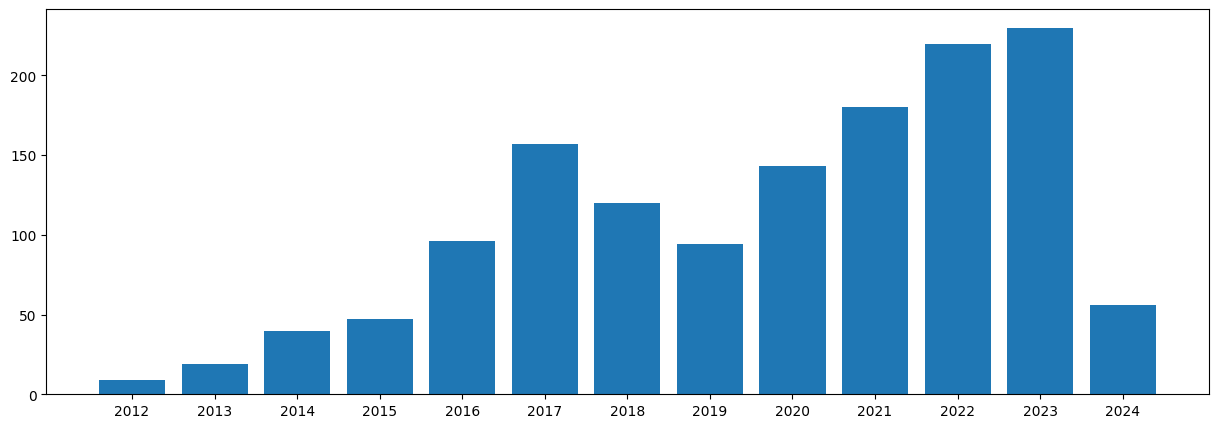

1411


In [23]:
graph = []
years = []
ticks = []

for year, cites in sorted(author['cites_per_year'].items()):
    if True:
        #if year == 2004:
        #    cites = cites - 110
        if year == 2013:
            cites = cites - ((penalty_type_counts["BBS_2013_PEN"]) * [v for v in BBS_2013_PEN.values()][0])
        elif year == 2016:
            cites = cites - ((penalty_type_counts["BBS_2016_PEN"]) * [v for v in BBS_2016_PEN.values()][0])
        elif year == 2017:
            cites = cites - ((penalty_type_counts["BBS_2017_PEN"]) * [v for v in BBS_2017_PEN.values()][0]) #- 2)
    print(year, cites)
    graph.append(cites)
    ticks.append(year)


#graph[-1] = 150
print(graph)

plt.figure(figsize=(15, 5))
plt.bar(ticks,graph)
#plt.plot(graph)

plt.xticks(ticks, ticks)
plt.savefig("citations.png")
plt.show()
print(sum(graph))

2011 144 4 36.0
2012 68 3 22.666666666666668
2013 62 6 10.333333333333334
2014 99 7 14.142857142857142
2015 327 12 27.25
2016 140 10 14.0
2017 218 12 18.166666666666668
2018 74 8 9.25
2019 54 8 6.75
2020 93 8 11.625
2021 131 10 13.1
2022 9 5 1.8
2023 1 3 0.3333333333333333
2024 0 1 0.0
[144, 68, 62, 99, 327, 140, 218, 74, 54, 93, 131, 9, 1, 0]


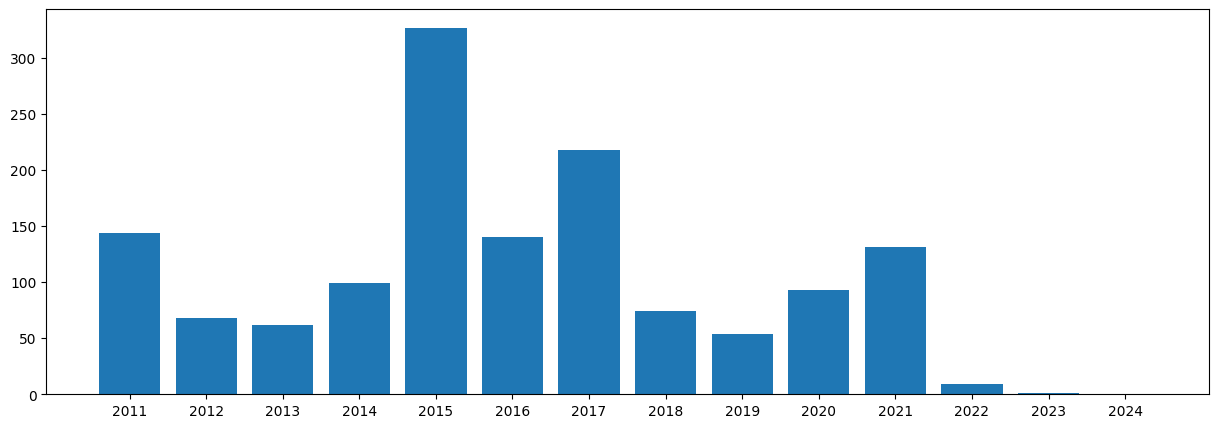

In [24]:
# which year's papers get cited the most?
graph = []
ticks = []
for year, papers in sorted(years_new.items(), key=lambda x:x[0]):
    if year <1500:
        continue
    print(year, sum(papers), len(papers), sum(papers)/len(papers))
    graph.append(sum(papers))
    ticks.append(year)
print(graph)

plt.figure(figsize=(15, 5))
plt.bar(ticks,graph)
#plt.plot(graph)

plt.xticks(ticks, ticks)
plt.savefig("citations_by_year_of_authorship.png")
plt.show()

In [25]:
qmul_phd = (sum(years_new[2011]) + sum(years_new[2012]) + sum(years_new[2013]) + (0.32 * sum(years_new[2014]))) /3.57
print("qmul phd 2010 oct -2014 april 14th", qmul_phd)
bielefeld = ((0.68 * sum(years_new[2014])) + sum(years_new[2015]) + sum(years_new[2016]) + sum(years_new[2017]))/3.68
print("bielefeld 2014 april 15th-2017 dec 31st", bielefeld)
qmul_lecturer = (sum(years_new[2018]) + sum(years_new[2019]) + sum(years_new[2020]) + sum(years_new[2021]) + sum(years_new[2022]) +  ((1/12)*sum(years_new[2023])))/5.08
print("qmul lecturer 2018 jan 1st -2023 jan 1st", qmul_lecturer)

qmul phd 2010 oct -2014 april 14th 85.62464985994399
bielefeld 2014 april 15th-2017 dec 31st 204.43478260869563
qmul lecturer 2018 jan 1st -2023 jan 1st 71.07939632545931
